# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn import linear_model, metrics
from matplotlib import pyplot as plt
from collections import Counter

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
with open('../data/checker_regression.csv', 'r') as fin:
    df = pd.read_csv(fin, sep=',', )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    59 non-null     float64
 3   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
df.fillna(0, inplace=True)
df.info()
print()
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
uid = {}
c = 0
for i in Counter(df.uid):
  uid[i] = c;
  c += 1
df["uid_num"] = [uid[df.uid[i]] for i in range(0, 77)]

scaller = StandardScaler()
X = df.drop(['uid', 'AVG(diff)'], axis=1).values
Y = df['AVG(diff)']

scaller.fit(X, Y)
X_scaled = scaller.transform(X)

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(X_scaled, Y, test_size = 0.2, random_state=21)

## 2. Crossvalidation

In [6]:
def crossval(n_splits, X, y, model):
  train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=21)

  ft_m = model.fit(train_data, train_labels)
  scores = cross_val_score(model, train_data, train_labels, cv=n_splits)
  scores_test = cross_val_score(model, test_data, test_labels, cv=n_splits)
  predict = cross_val_predict(ft_m, test_data, test_labels, cv=n_splits)
  accuracy = metrics.mean_squared_error(test_labels, predict)

  for i in range(0, len(scores)):
    print(f'train - {scores[i]} | test - {scores_test[i]}')
  print(f'Average RMSE on crossval is {accuracy}')

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [7]:
regr = linear_model.LinearRegression()
crossval(6, X_scaled, Y, regr)

train - 0.0 | test - 0.004961726951508094
train - 0.0963400544551003 | test - -0.5428483665232184
train - -693.7073835189221 | test - 0.0
train - -1.094153649351279 | test - -0.8009205015492369
train - 0.6001615808128324 | test - 0.0
train - 0.09683923334488986 | test - 0.0
Average RMSE on crossval is 5525.123876204745


In [8]:
treeRegr = DecisionTreeRegressor(random_state=21)
crossval(6, X_scaled, Y, treeRegr)

train - 1.0 | test - -4.596767509324493
train - 0.47179551899476235 | test - -0.2743937831420151
train - -1866.7777777777776 | test - 0.0
train - 0.4911702405910613 | test - 0.6893858098724908
train - -0.9918996463812577 | test - 1.0
train - 0.47109860051659336 | test - 1.0
Average RMSE on crossval is 3198.513125


In [9]:
rFrstRegr = RandomForestRegressor(random_state = 21)
crossval(6, X_scaled, Y, rFrstRegr)

train - 1.0 | test - -5.006453579776215
train - 0.36156757125967476 | test - -0.2429836321548351
train - -1990.7990523456756 | test - 0.0
train - 0.5306663850289821 | test - 0.0047484946976384945
train - -0.44749032017942025 | test - 0.0
train - 0.484449411221871 | test - 0.0
Average RMSE on crossval is 3551.0611675


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

/var/folders/zz/zyxvpxvq6csfxvn_n0001y6w000gjq/T/ipykernel_79614/3149163200.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_labels, predict, cmap='Accent')


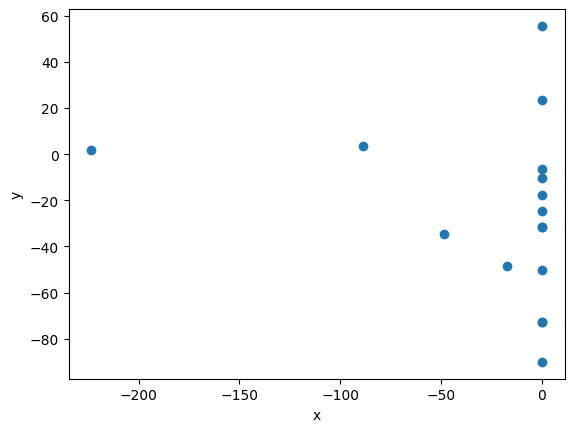

,test_labels,predict
3,0.0,-6.553475
19,-17.5,-48.498622
14,-48.5,-34.476767
45,-223.6,1.726877
10,0.0,-10.341673
54,0.0,23.366655
23,0.0,-31.607499
29,0.0,-90.048501
24,0.0,-31.607499
13,-89.0,3.661616


In [10]:
ft_m = regr.fit(train_data, train_labels)
predict = cross_val_predict(ft_m, test_data, test_labels, cv=6)
picasso = pd.DataFrame()
picasso["test_labels"] = test_labels
picasso["predict"] = predict


plt.scatter(test_labels, predict, cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
picasso

/var/folders/zz/zyxvpxvq6csfxvn_n0001y6w000gjq/T/ipykernel_79614/740387844.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_labels, predict, cmap='Accent')


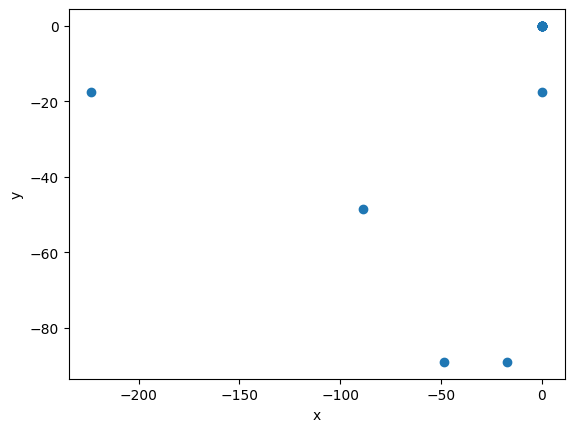

,test_labels,predict
3,0.0,0.0
19,-17.5,-89.0
14,-48.5,-89.0
45,-223.6,-17.5
10,0.0,0.0
54,0.0,0.0
23,0.0,0.0
29,0.0,-17.5
24,0.0,0.0
13,-89.0,-48.5


In [11]:
ft_m = treeRegr.fit(train_data, train_labels)
predict = cross_val_predict(ft_m, test_data, test_labels, cv=6)
picasso_tree = pd.DataFrame()
picasso_tree["test_labels"] = test_labels
picasso_tree["predict"] = predict


plt.scatter(test_labels, predict, cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
picasso_tree

/var/folders/zz/zyxvpxvq6csfxvn_n0001y6w000gjq/T/ipykernel_79614/3130210833.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_labels, predict, cmap='Accent')


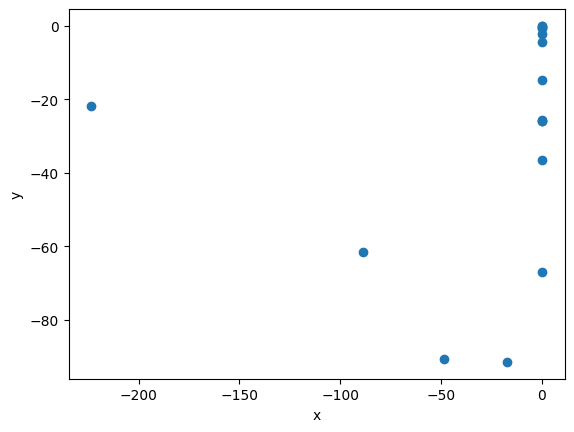

,test_labels,predict
3,0.0,-4.450
19,-17.5,-91.412
14,-48.5,-90.500
45,-223.6,-21.660
10,0.0,-25.505
54,0.0,0.000
23,0.0,-0.485
29,0.0,-36.570
24,0.0,-0.485
13,-89.0,-61.507


In [12]:
ft_m = rFrstRegr.fit(train_data, train_labels)
predict = cross_val_predict(ft_m, test_data, test_labels, cv=6)
picasso_rndFrst = pd.DataFrame()
picasso_rndFrst["test_labels"] = test_labels
picasso_rndFrst["predict"] = predict


plt.scatter(test_labels, predict, cmap='Accent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
picasso_rndFrst

В идеальном случае - это прямрая кх+в под углом 45 градусов первую четверть